# Recommendation System


Recommender systems are machine learning algorithms that suggest relevant items to users based on patterns in data. They're used extensively by companies like Netflix, Amazon, and Spotify to suggest content, products, and music.

- **Rating**: represents rating or preference score that a user would give to an item, which can be used to generate personalized recommendations.

Here are the main types:

1. Collaborative Filtering
   - User-Based: Recommends items based on preferences of similar users
   - Item-Based: Recommends items similar to ones the user already likes
   - Advantages: Works well with user preference data
   - Disadvantages: Cold start problem for new users/items
      - the "cold start" problem (not having enough ratings for new users/items)
      - Solution: provide a survey to gather ratings from new users when they first sign up

2. Content-Based Filtering
   - Uses item features/attributes to make recommendations
   - Example: Recommending movies based on genre, actors, director
   - Advantages: No cold start problem for items
   - Disadvantages: Limited to known item features

3. Hybrid Recommender Systems
   - Combines multiple approaches
   - Can overcome limitations of individual methods
   - Example: Netflix combines viewing history (collaborative) with content features (content-based)

4. Knowledge-Based
   - Uses explicit rules and domain knowledge
   - Good for complex items like cars or houses
   - Advantages: Works well for infrequently purchased items

5. Context-Aware
   - Considers situational context (time, location, device)
   - Example: Recommending restaurants based on time of day and location

Would you like me to elaborate on any of these types or explain specific algorithms used within them?

## Collaborative Filtering

### What is it?
Collaborative filtering algorithms recommend items by analyzing user preferences collected from numerous users. They predict future behavior by identifying patterns in historical data, such as which movies users have enjoyed, allowing the system to suggest items with a high likelihood of user agreement.

For example, if two users have similar tastes in movies, the system might recommend a new movie to one user that the other has favorably rated.

### Mathematical Concept:

To quantify the similarity between user preferences, collaborative filtering uses cosine similarity, where user ratings are vectors in a multidimensional space:
$$
\text{similarity} = \cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}
$$
Where:
- $\mathbf{A}$ and $\mathbf{B}$ are vectors representing user ratings.
- $\theta$ is the angle between these vectors, which indicates the degree of similarity in user preferences.


A smaller angle (or higher cosine similarity) indicates more closely aligned preferences, suggesting that users will likely enjoy similar items. This approach enables more precise recommendations based on shared user interests.

![cos](https://kdb.ai/files/2024/01/similarity-768x348.png)

![user](https://www.oreilly.com/api/v2/epubs/9781789807943/files/assets/d22941f0-29d2-4c0e-8a79-5f065e5f527e.png)

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_08/Collaborative_Filtering.png)

#### __Example:__

Let's explore an example of user-based collaborative filtering using the `anime.csv` and `rating.csv` datasets. In the `rating.csv` file, each row represents a user's rating for a specific anime. By merging this dataset with `anime.csv` based on anime IDs, you can construct a user-item interaction matrix. In this matrix, rows correspond to users, columns represent anime titles, and the values are the ratings. This matrix is crucial for performing similarity calculations.

To measure the similarity between users' anime preferences, you'll use the `cosine_similarity` function. Here, each user's preferences are depicted as vectors in a high-dimensional space, where each dimension corresponds to an anime title. Cosine similarity quantifies the similarity of these vectors by calculating the cosine of the angle between them. Higher scores suggest a greater similarity among users' preferences.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import catppuccin
import matplotlib as mpl
mpl.style.use(catppuccin.PALETTE.mocha.identifier)

from sklearn.metrics.pairwise import cosine_similarity


In [2]:
path = '/Users/bassel_instructor/Documents/Datasets/'
df = pd.read_csv(path+'rating.csv')
df.head()

user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4        1       241      -1

<Axes: xlabel='rating', ylabel='count'>

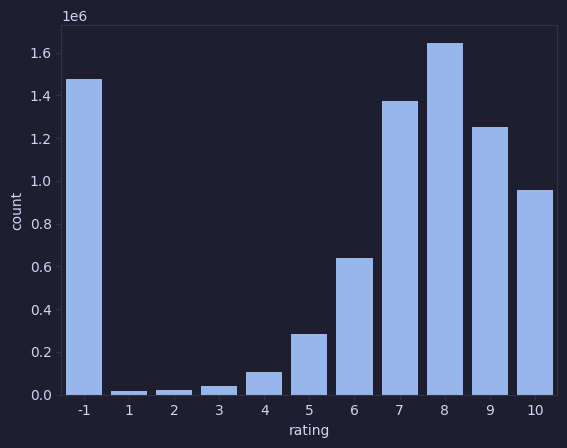

In [ ]:
sns.countplot(data=df, x='rating')

In [ ]:
# Exclude rows where the rating is -1 (implying missing or few ratings from individuals)
df = df[df['rating'] != -1]
df.head()

user_id  anime_id  rating
47         1      8074      10
81         1     11617      10
83         1     11757      10
101        1     15451      10
153        2     11771      10

<Axes: xlabel='rating', ylabel='count'>

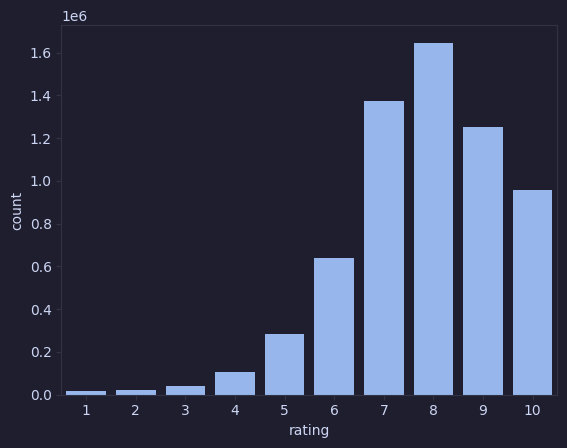

In [ ]:
sns.countplot(data=df, x='rating')

In [ ]:
df.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [ ]:
df.shape

(6337241, 3)

In [ ]:
# Calculate the number of unique user IDs in the filtered ratings dataset
len(df['user_id'].unique())
#method 2 .nunique()

69600

In [ ]:
# Calculate the number of unique anime IDs in the 'animes' dataset
df['anime_id'].nunique()

9927

In [ ]:
# Calculate the number of ratings per user
ratings_per_user = df.groupby('user_id')[['rating']].count()
ratings_per_user.head()

rating
user_id        
1             4
2             1
3            92
5           459
7           343

In [ ]:
# Calculate the mean number of ratings per user
ratings_per_user.mean()

rating    91.052313
dtype: float64

In [ ]:
ratings_per_user.nsmallest(10, 'rating')

rating
user_id        
2             1
9             1
15            1
35            1
59            1
70            1
86            1
113           1
114           1
131           1

__Observations:__
- The average user has rated about 91 items, indicating a moderately active engagement in rating items within the dataset.
- With an average of 91 ratings per user, the dataset shows a balance of user activity that is not skewed by extremely active users.

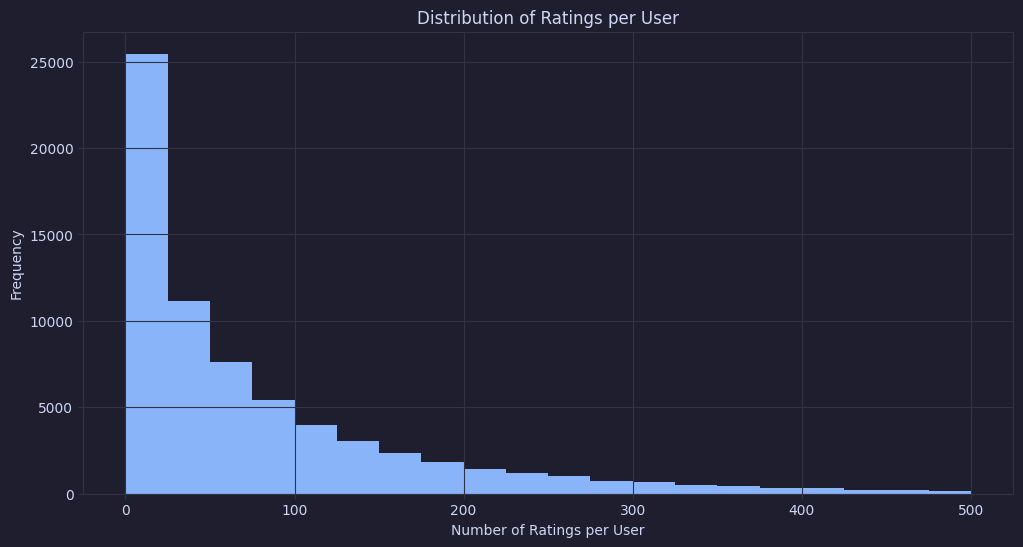

In [ ]:
#Plot a histogram of the number of ratings per user
ratings_per_user.hist(bins=20, range=(0,500),figsize=(12,6))
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings per User')
plt.show()

<Axes: xlabel='rating'>

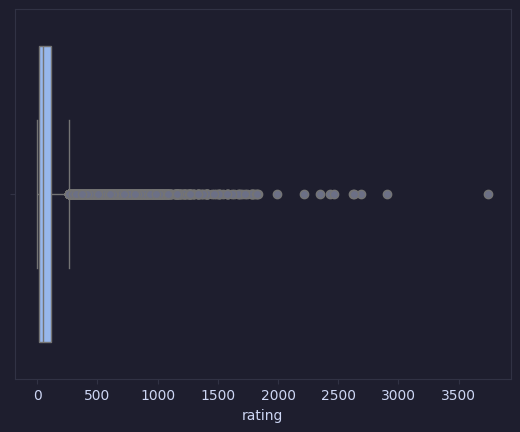

In [ ]:
sns.boxplot(x=ratings_per_user['rating'])

__Observations:__
- The histogram displays a right-skewed distribution, indicating that most users have rated fewer than 100 items.
- A very small number of users have rated between 100 and 500 items, with the frequency decreasing as the number of ratings increases.
- As shown by the bars approaching zero frequency, users providing a high number of ratings are exceedingly rare.

In [ ]:
# Calculate the number of ratings per anime
ratings_per_anime = df.groupby('anime_id')[['rating']].count()

# Calculate the mean number of ratings per anime
ratings_per_anime.mean()

rating    638.384305
dtype: float64

__Observations:__
- On average, each anime title receives approximately 638 ratings, which implies a diverse range of viewer engagement levels.
- The mean of 638 ratings per anime suggests that while some receive more attention, many others have far fewer ratings.

Text(0.5, 1.0, 'Distribution of Ratings per Anime')

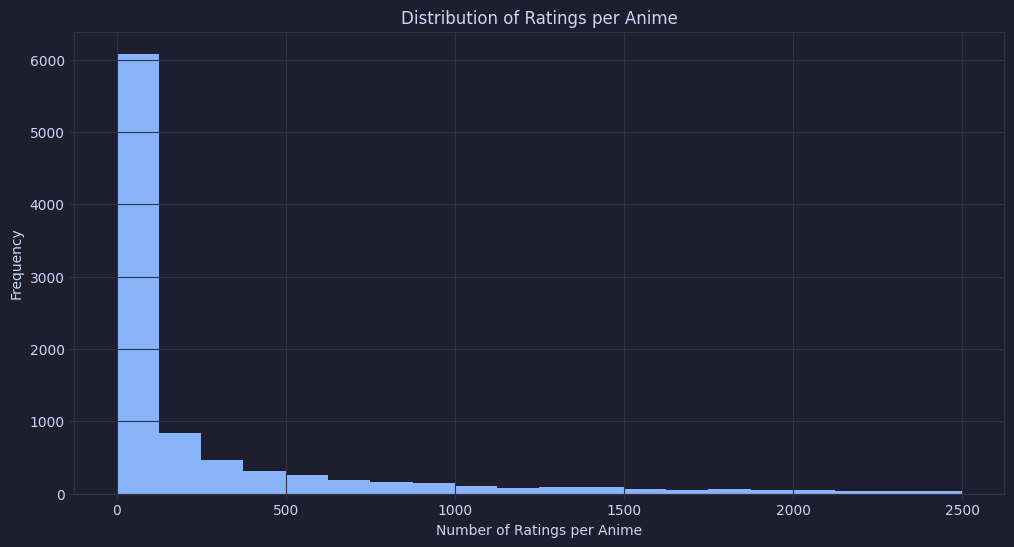

In [ ]:

# Plot a histogram of the number of ratings per anime
ratings_per_anime.hist(bins=20, range=(0,2500),figsize=(12,6))
plt.xlabel('Number of Ratings per Anime')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings per Anime')

__Observations:__
- The highest frequency of anime titles has between 0 and 250 ratings, as depicted by the first bar in the histogram.
- Very few anime titles receive more than 1500 ratings, highlighting a significant drop-off in frequency as the number of ratings increases.

Filter ratings greater than 1000 to find a popular anime and extract the anime IDs of popular anime.

In [ ]:
# Filter the DataFrame to include only anime with 1000 or more ratings
filtered_ratings_per_anime_df = ratings_per_anime[ratings_per_anime['rating'] >= 1000]
filtered_ratings_per_anime_df.shape

(1462, 1)

In [ ]:
# Extract the indices (anime IDs) of popular anime
popular_anime = filtered_ratings_per_anime_df.index.tolist()
popular_anime[:20]

[1, 5, 6, 7, 15, 16, 18, 19, 20, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 43]

Filter ratings greater than 500 and create an index to list prolific users.

In [ ]:
# Filter the DataFrame to include only users with 500 or more ratings
filtered_ratings_per_user_df = ratings_per_user[ratings_per_user.rating >= 500]
filtered_ratings_per_user_df.shape

(1365, 1)

In [ ]:

# Extract the indices (user IDs) of prolific users
prolific_users = filtered_ratings_per_user_df.index.tolist()
prolific_users[:10]

[226, 271, 294, 392, 446, 478, 661, 741, 771, 786]

In [ ]:
# Filter the ratings dataset to include only ratings for popular anime
filtered_ratings = df[df['anime_id'].isin(popular_anime)]
print(f'{len(filtered_ratings):,}')

5,192,794


In [ ]:

# Further filter the ratings dataset to include only ratings from prolific users
filtered_ratings = df[df['user_id'].isin(prolific_users)]

# Calculate the length of the filtered ratings dataset
print(f'{len(filtered_ratings):,}')

1,005,314


In [ ]:
# Create a pivot table to construct the user-item rating matrix
#for missing values where a user did not give a rating, use 0

rating_matrix = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating', fill_value=0)

# or Fill missing values (NaN) with 0
#rating_matrix = rating_matrix.fillna(0)

# Display the first few rows of the user-item rating matrix
rating_matrix.head()

anime_id  1      5      6      7      8      15     16     17     18     \
user_id                                                                   
226           8      0      8      0      0      0      0      0      0   
271           0      0      0      0      0      0      0      0      0   
294           7      7      0      0      0      0      0      0      0   
392           7      0      7      0      0      0      0      0      7   
446           9      8      9      0      0      0      0      0      0   

anime_id  19     ...  34238  34239  34240  34252  34283  34324  34325  34349  \
user_id          ...                                                           
226           0  ...      0      0      0      0      0      0      0      0   
271           0  ...      0      0     10      0      0      0      0      0   
294           0  ...      0      0      0      0      0      0      0      0   
392           0  ...      0      0      0      0      0      0      0      0   
446          10  ...      0      0      9      0      0      0      0      0   

anime_id  34367  34475  
user_id                 
226           0      0  
271           0      0  
294           0      0  
392           0      0  
446           0      0  

[5 rows x 9591 columns]

Make sure your rating on a scale that starts from 1 so you can use 0 to replace missing values

In [ ]:

# Compute cosine similarity between users
user_similarity = cosine_similarity(rating_matrix)
user_similarity

array([[1.        , 0.31052381, 0.36980954, ..., 0.36236069, 0.33636818,
        0.30650698],
       [0.31052381, 1.        , 0.268366  , ..., 0.290322  , 0.2870974 ,
        0.22791986],
       [0.36980954, 0.268366  , 1.        , ..., 0.3498557 , 0.41170536,
        0.37794637],
       ...,
       [0.36236069, 0.290322  , 0.3498557 , ..., 1.        , 0.34721124,
        0.31961904],
       [0.33636818, 0.2870974 , 0.41170536, ..., 0.34721124, 1.        ,
        0.42175493],
       [0.30650698, 0.22791986, 0.37794637, ..., 0.31961904, 0.42175493,
        1.        ]])

In [ ]:
# Convert to a DataFrame for easier manipulation and interpretation
user_similarity_df = pd.DataFrame(user_similarity, index=rating_matrix.index, columns=rating_matrix.index)
user_similarity_df

user_id     226       271       294       392       446       478       661    \
user_id                                                                         
226      1.000000  0.310524  0.369810  0.368844  0.479172  0.351496  0.339471   
271      0.310524  1.000000  0.268366  0.221096  0.342823  0.376454  0.306231   
294      0.369810  0.268366  1.000000  0.358606  0.387980  0.394491  0.360027   
392      0.368844  0.221096  0.358606  1.000000  0.397043  0.307310  0.293243   
446      0.479172  0.342823  0.387980  0.397043  1.000000  0.377938  0.405816   
...           ...       ...       ...       ...       ...       ...       ...   
73362    0.288167  0.346684  0.340823  0.266032  0.292046  0.450861  0.272566   
73378    0.453607  0.357435  0.451359  0.434801  0.481478  0.465542  0.359494   
73395    0.362361  0.290322  0.349856  0.360945  0.401871  0.404292  0.332429   
73499    0.336368  0.287097  0.411705  0.304120  0.340195  0.387321  0.285049   
73502    0.306507  0.227920  0.377946  0.242900  0.335937  0.389914  0.301600   

user_id     741       771       786    ...     73234     73272     73286  \
user_id                                ...                                 
226      0.453386  0.397297  0.384594  ...  0.290858  0.362299  0.413587   
271      0.345585  0.357868  0.493646  ...  0.272166  0.159041  0.307801   
294      0.419455  0.361109  0.470477  ...  0.361611  0.282967  0.362801   
392      0.316196  0.396577  0.314374  ...  0.286049  0.340013  0.342345   
446      0.430414  0.404201  0.430761  ...  0.357724  0.353429  0.402775   
...           ...       ...       ...  ...       ...       ...       ...   
73362    0.358541  0.437512  0.412681  ...  0.334768  0.207235  0.350239   
73378    0.462871  0.504422  0.487243  ...  0.431488  0.297537  0.450135   
73395    0.377932  0.367900  0.397738  ...  0.366442  0.264322  0.403430   
73499    0.428791  0.391158  0.394896  ...  0.378386  0.263148  0.392992   
73502    0.413999  0.410354  0.343049  ...  0.433633  0.239898  0.381860   

user_id     73340     73356     73362     73378     73395     73499     73502  
user_id                                                                        
226      0.434253  0.309391  0.288167  0.453607  0.362361  0.336368  0.306507  
271      0.289110  0.096752  0.346684  0.357435  0.290322  0.287097  0.227920  
294      0.413025  0.353574  0.340823  0.451359  0.349856  0.411705  0.377946  
392      0.465727  0.322202  0.266032  0.434801  0.360945  0.304120  0.242900  
446      0.431481  0.314192  0.292046  0.481478  0.401871  0.340195  0.335937  
...           ...       ...       ...       ...       ...       ...       ...  
73362    0.349987  0.238223  1.000000  0.396227  0.318946  0.332661  0.355931  
73378    0.470631  0.343550  0.396227  1.000000  0.439854  0.456134  0.454755  
73395    0.380225  0.244898  0.318946  0.439854  1.000000  0.347211  0.319619  
73499    0.383892  0.307080  0.332661  0.456134  0.347211  1.000000  0.421755  
73502    0.349768  0.370379  0.355931  0.454755  0.319619  0.421755  1.000000  

[1365 rows x 1365 columns]

For ease of use, we'll build a function that derives the recommendation from the user cosine similarity matrix

In [ ]:

# Function to recommend anime based on similar users
def recommend_anime(user_id, user_item_matrix, user_similarity_df, top_n=5):
    # Get the user's ratings
    user_ratings = user_item_matrix.loc[user_id]

    # Find similar users based on cosine similarity
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    
    # Store anime recommendations
    recommendations = pd.Series(dtype='float64')
    
    for similar_user in similar_users.index[1:]:  # Skip the first one as it's the user themselves
        # Get ratings of the similar user
        similar_user_ratings = user_item_matrix.loc[similar_user]
        
        # Find the anime the similar user has rated but the current user hasn't
        recommended_anime = similar_user_ratings[similar_user_ratings > 0].index.difference(user_ratings[user_ratings > 0].index)
        
        # Append those anime to the recommendations
        recommendations = pd.concat([recommendations, similar_user_ratings.loc[recommended_anime]])

    # Sort recommendations by rating and return the top N
    recommendations = recommendations.sort_values(ascending=False).drop_duplicates()
    return recommendations.head(top_n)


In [ ]:
user_similarity_df.sample(20).index[:20]

Index([55289, 66563, 28545, 27157, 51792, 44352, 52964, 21260, 60791, 58050,
       68473, 49471, 19317, 52438, 12431,   741, 43632,  3193, 20732, 72060],
      dtype='int64', name='user_id')

In [ ]:

# Example usage:
user_id = 226
recommended_anime = recommend_anime(user_id, rating_matrix, user_similarity_df)
print(f"Anime recommendations for user {user_id}:")
print(recommended_anime)


Anime recommendations for user 226:
24031    10
6964      9
31964     8
6951      7
654       6
dtype: int64


In [ ]:

# Example usage:
user_id = 50671
recommended_anime = recommend_anime(user_id, rating_matrix, user_similarity_df)
print(f"Anime recommendations for user {user_id}:")
print(recommended_anime)


Anime recommendations for user 50671:
181      10
31964     9
10216     8
32802     7
9624      6
dtype: int64


The results you provided suggest a list of recommended anime for **User 50671**, along with the predicted ratings for each one. Here's how to interpret these recommendations:

### 1. **Understanding the Recommendations**:
   - **Anime ID 181 with a rating of 10**: This means that the recommendation system predicts that User 50671 would rate Anime ID 181 as a **10/10**, suggesting it’s a top recommendation for this user.
   - **Anime ID 31964 with a rating of 9**: This anime is likely to be highly enjoyable to the user, with a predicted rating of **9/10**.
   - **Anime ID 10216 with a rating of 8**: The system believes the user would rate this anime as an **8/10**, meaning they would still likely enjoy it.
   - **Anime ID 32802 with a rating of 7**: The user may find this anime enjoyable but not exceptional, based on a predicted rating of **7/10**.
   - **Anime ID 9624 with a rating of 6**: This anime is predicted to be just okay for the user, with a rating of **6/10**.

### 2. **How the Recommendations Are Ranked**:
   - The recommendations are sorted by **predicted user ratings**, with higher predicted ratings indicating the anime that the system believes the user would like the most.
   - In this case, **Anime ID 181** is the most highly recommended for User 50671, followed by Anime IDs 31964, 10216, etc.

### 3. **Predicted Rating Meaning**:
   - **10 (for Anime 181)**: This anime is predicted to be a perfect match for the user’s tastes, similar to anime the user has highly rated in the past or similar to anime rated highly by other similar users.
   - **9, 8, 7, 6**: These represent slightly lower predicted ratings but still suggest that the user will likely enjoy these anime. The rating reflects the confidence the system has in how much the user will enjoy each one.


In [ ]:
df_anime = pd.read_csv(path+'anime.csv')
df_anime.head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

In [ ]:
print(f"Recommended items for user {user_id}:\n {df_anime[df_anime['anime_id'].isin(recommended_anime.index)]['name']}")

Recommended items for user 50671:
 178                       Boku no Hero Academia
1198             Yondemasu yo, Azazel-san. (TV)
1461                 Vandread: The Second Stage
2869    Cardfight!! Vanguard G: Stride Gate-hen
3931                     30-sai no Hoken Taiiku
Name: name, dtype: object


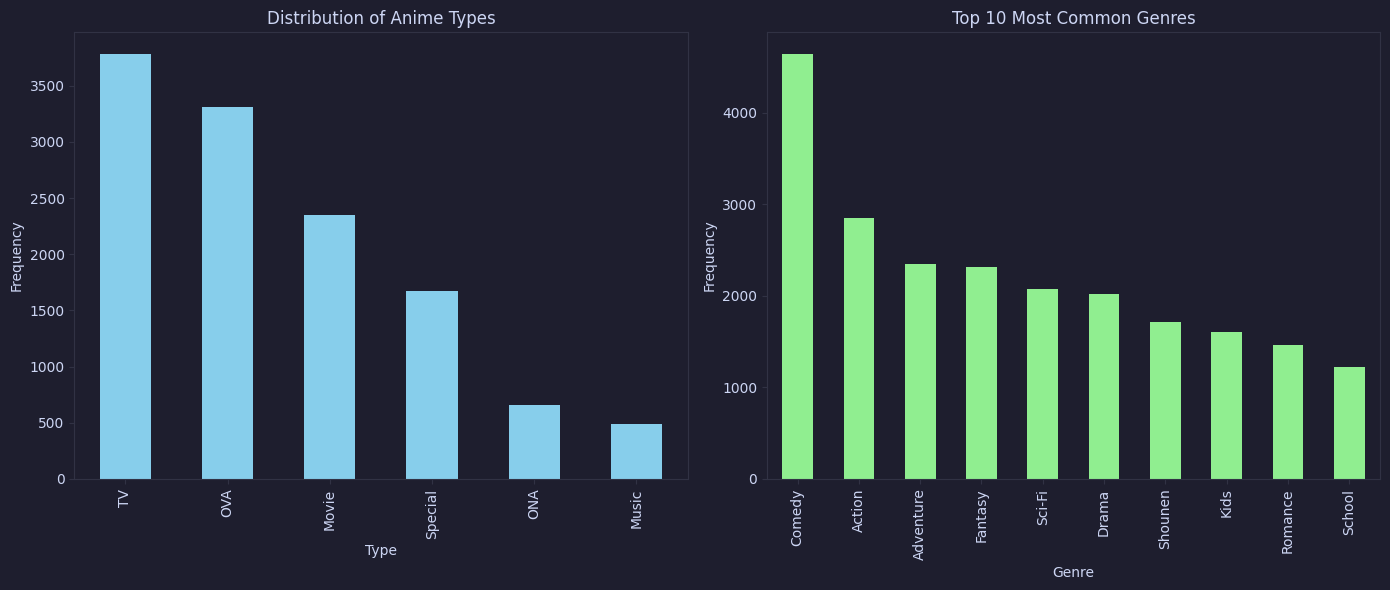

In [ ]:
# Analyzing categorical variables
type_counts = df_anime['type'].value_counts()
genre_counts = df_anime['genre'].str.split(', ').explode().value_counts().head(10)

# Plotting the distributions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

type_counts.plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Anime Types')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Type')

genre_counts.plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Top 10 Most Common Genres')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Genre')

plt.tight_layout()
plt.show()


#### 4. **Recommendations for Action**:
   - **Watchlist**: The user can prioritize anime with higher predicted ratings (e.g., Anime ID 181 and 31964) for their watchlist.
   - **Exploration**: Lower-rated recommendations, like Anime ID 9624 with a predicted rating of 6, could still be worth exploring, but they may not align as closely with the user’s typical preferences.

#### 5. **Possible Improvements**:
   - **Filtering by minimum rating**: If User 50671 only wants to see highly recommended shows, you might filter out anime with predicted ratings below a certain threshold (e.g., 7 or 8).
   - **Explore genres**: Consider adding genre filtering or weighting to better tailor the recommendations based on the user's favorite genres.

#### Final Thoughts:
The results provide a clear picture of anime that the system thinks User 50671 will enjoy based on the preferences of other similar users. The higher the predicted rating, the more confident the system is that the user will like that particular anime.

Would you like help with adding more filters or adjusting the recommendation algorithm further?

## Item-Based Collaborative Filtering

Item-based collaborative filtering is a recommendation technique that suggests items to users based on the similarity between items rather than the similarity between users. It operates on the assumption that if a user has interacted positively with certain items in the past, they will likely interact positively with similar items in the future.

In [9]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Define the dataset
dataset = {
    'user1': {'Mindhunter': 5, 'You': 3, 'Dexter': 3, 'Mr. Robot': 3, 'True Detective': 2, 'Twin Peaks': 3},
    'user2': {'Mindhunter': 5, 'You': 3, 'Mr. Robot': 5, 'Dexter': 5, 'Twin Peaks': 3, 'True Detective': 3},
    'user3': {'Mindhunter': 2, 'Dexter': 5, 'Mr. Robot': 3, 'Twin Peaks': 4},
    'user4': {'Dexter': 5, 'Twin Peaks': 4, 'Mr. Robot': 4},
    'user5': {'Mindhunter': 4, 'You': 4, 'Dexter': 4, 'Twin Peaks': 3, 'True Detective': 2},
    'user6': {'Mindhunter': 3, 'Dexter': 4, 'Twin Peaks': 3, 'Mr. Robot': 5, 'True Detective': 3},
    'user7': {'Dexter': 4, 'True Detective': 1, 'Mr. Robot': 4}
}

# Convert the dataset into a Pandas DataFrame (user-item matrix)
df = pd.DataFrame(dataset).T.fillna(0)  # Transpose to get users as rows and fill NaN with 0
df

Mindhunter  You  Dexter  Mr. Robot  True Detective  Twin Peaks
user1         5.0  3.0     3.0        3.0             2.0         3.0
user2         5.0  3.0     5.0        5.0             3.0         3.0
user3         2.0  0.0     5.0        3.0             0.0         4.0
user4         0.0  0.0     5.0        4.0             0.0         4.0
user5         4.0  4.0     4.0        0.0             2.0         3.0
user6         3.0  0.0     4.0        5.0             3.0         3.0
user7         0.0  0.0     4.0        4.0             1.0         0.0

In [10]:
df = df.T  # Now, rows are TV shows, columns are users (item-based filtering)
df

user1  user2  user3  user4  user5  user6  user7
Mindhunter        5.0    5.0    2.0    0.0    4.0    3.0    0.0
You               3.0    3.0    0.0    0.0    4.0    0.0    0.0
Dexter            3.0    5.0    5.0    5.0    4.0    4.0    4.0
Mr. Robot         3.0    5.0    3.0    4.0    0.0    5.0    4.0
True Detective    2.0    3.0    0.0    0.0    2.0    3.0    1.0
Twin Peaks        3.0    3.0    4.0    4.0    3.0    3.0    0.0

In [ ]:

# Compute item similarity using cosine similarity
item_similarity = cosine_similarity(df)
item_similarity_df = pd.DataFrame(item_similarity, index=df.index, columns=df.index)

def recommend_shows(user, top_n=3):
    """Recommend shows for a given user based on items they rated highly."""
    if user not in dataset:
        return "User not found."

    user_ratings = dataset[user]
    recommendations = {}

    for show, rating in user_ratings.items():
        if rating > 3:  # Focus on highly rated shows
            similar_shows = item_similarity_df[show].drop(index=show).sort_values(ascending=False)
            for similar_show, similarity in similar_shows.items():
                if similar_show not in user_ratings:  # Unwatched show
                    if similar_show not in recommendations:  # if the user did not rate, then they did not see the show
                        recommendations[similar_show] = 0
                    recommendations[similar_show] += similarity * rating

    # Sort recommendations by highest predicted rating
    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)

    return [show for show, _ in sorted_recommendations[:top_n]]

# Example usage: Recommend shows for user3
print("Recommendations for user3:", recommend_shows('user3'))


In [147]:
# Convert the dataset dictionary to a DataFrame
df = pd.read_csv(path+'movies_sample.csv', index_col=0)

# Fill missing values (NaN) with "Not Seen Yet"
df.fillna("Not Seen Yet", inplace=True)

# Display the DataFrame

df.head()

user1  user2         user3         user4         user5  \
Mindhunter          5      5           2.0  Not Seen Yet           4.0   
You                 3      3  Not Seen Yet  Not Seen Yet           4.0   
Dexter              3      5           5.0           5.0           4.0   
Mr. Robot           3      5           3.0           4.0  Not Seen Yet   
True Detective      2      3  Not Seen Yet  Not Seen Yet           2.0   

                       user6         user7  
Mindhunter               3.0  Not Seen Yet  
You             Not Seen Yet  Not Seen Yet  
Dexter                   4.0           4.0  
Mr. Robot                5.0           4.0  
True Detective           3.0           1.0

- Create a custom function to get the unique web series in the dataset.

In [108]:
def unique_items():
    # Initialize an empty list to store unique items
    unique_items_list = []

    # Iterate through each person in the dataset
    for person in dataset.keys():
        # Iterate through the items rated by each person
        for items in dataset[person]:
            # Append each item to the unique_items_list
            unique_items_list.append(items)

    # Convert the list to a set to remove duplicates
    s = set(unique_items_list)

    # Convert the set back to a list to maintain the order of items
    unique_items_list = list(s)

    # Return the list of unique items
    return unique_items_list

In [109]:
# Call the unique_items() function to obtain a list of unique items present in the dataset
unique_items()

['Twin Peaks',
 'The Haunting of Hill House',
 'The X-Files',
 'True Detective',
 'Mr. Robot',
 'You',
 'Stranger Things',
 'Peaky Blinders',
 'Mindhunter',
 'Dexter',
 'Killing Eve']

- Define a function that determines the similarity between two items based on their ratings. This function iterates through the dataset to identify individuals' common ratings for both items. It then calculates the cosine similarity between the ratings of item 1 and item 2.

In [110]:
def item_similarity(item1, item2):
    # Initialize a dictionary to store ratings of both items by common users
    both_rated = {}

    # Iterate through each person in the dataset
    for person in dataset.keys():
        # Check if both items are rated by the current person
        if item1 in dataset[person] and item2 in dataset[person]:
            # Store the ratings of both items by the current person
            both_rated[person] = [dataset[person][item1], dataset[person][item2]]

    # Calculate the number of ratings both items share
    number_of_ratings = len(both_rated)

    # If there are no common ratings, return 0 (indicating no similarity)
    if number_of_ratings == 0:
        return 0

    # Extract ratings of item1 and item2 by common users
    item1_ratings = [[dataset[k][item1] for k, v in both_rated.items() if item1 in dataset[k] and item2 in dataset[k]]]
    item2_ratings = [[dataset[k][item2] for k, v in both_rated.items() if item1 in dataset[k] and item2 in dataset[k]]]

    # Calculate cosine similarity between item1 and item2 ratings
    cs = cosine_similarity(item1_ratings, item2_ratings)

    # Return the cosine similarity score
    return cs[0][0]

In [111]:
# Print the cosine similarity between 'Dexter' and 'Mr. Robot' based on their ratings
print("Cosine Similarity:", item_similarity('Dexter', 'Mr. Robot'))

Cosine Similarity: 0.9603111594807082


- Define a function to determine similar items to a specified target item. This function calculates the similarity scores between the target item and all other items in the dataset. Then, it sorts these similarity scores in descending order and returns the sorted list.

In [112]:
def most_similar_items(target_item):
    # Obtain a list of all unique items
    un_lst = unique_items()

    # Calculate similarity scores between the target item and all other items
    scores = [(item_similarity(target_item, other_item), target_item + " --> " + other_item) for other_item in un_lst if other_item != target_item]

    # Sort the similarity scores in descending order
    scores.sort(reverse=True)

    # Return the sorted similarity scores
    return scores

In [113]:
# Print the most similar items to 'Dexter' based on their similarity scores
print(most_similar_items('Dexter'))

[(1.0, 'Dexter --> Peaky Blinders'), (1.0, 'Dexter --> Killing Eve'), (0.990830168044299, 'Dexter --> Twin Peaks'), (0.9603111594807082, 'Dexter --> Mr. Robot'), (0.9601587170383663, 'Dexter --> You'), (0.9199418174856334, 'Dexter --> Mindhunter'), (0.916584563409776, 'Dexter --> True Detective'), (0, 'Dexter --> The X-Files'), (0, 'Dexter --> The Haunting of Hill House'), (0, 'Dexter --> Stranger Things')]


- Define a function to recommend movies to a target user by identifying the movies they have not rated. The function collects the movies rated by the target user and calculates the set difference between all movies and the ones rated by the target user. It returns the list of recommended movies along with the list of movies rated by the target user.

In [114]:
def target_shows_to_users(target_person):
    # Initialize a list to store tv shows rated by the target person
    target_person_show_lst = []

    # Obtain a list of all unique items (movies)
    unique_list = unique_items()

    # Collect tv sows rated by the target person
    for shows in dataset[target_person]:
        target_person_show_lst.append(shows)

    # Convert the unique item list to a set to perform set difference operation
    s = set(unique_list)

    # Get the list of recommended tv shows by finding the set difference between all tv shows and those rated by the target person
    recommended_shows = list(s.difference(target_person_show_lst))

    # Calculate the number of recommended tv shows
    a = len(recommended_shows)

    # If there are no recommended tv shows, return 0
    if a == 0:
        return 0

    # Otherwise, return the list of recommended tv shows and the list of tv shows rated by the target person
    return recommended_shows, target_person_show_lst

- The `target_shows_to_users` function is utilized to retrieve the lists of unseen and seen movies for user `user7`. Subsequently, a dictionary is generated to store these unseen and seen movies and then converted into a DataFrame for enhanced visualization.

In [115]:
# Obtain lists of unseen and seen tv shows for user 'user7' using the target_shows_to_users function
unseen_shows, seen_shows = target_shows_to_users('user7')

# Create a dictionary to store unseen and seen movies
dct = {"Seen Shows": seen_shows, "Unseen Shows": unseen_shows}

# Convert the dictionary to a DataFrame for better visualization
pd.DataFrame(dct)

ValueError: All arrays must be of the same length

__Observation:__
- The provided output displays TV shows that `user7` has already watched alongside those they have not, suggesting potential new interests.

This code functions as an item-based recommendation system, leveraging user
ratings to compute how similar various TV shows are and then recommending new but similar shows to an individual user through collaborative filtering techniques.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Fill missing values in genre with an empty string
df['genre'] = df['genre'].fillna('')

# Convert genres to a numerical representation using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genre'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on anime title
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the anime that matches the title
    idx = df[df['name'] == title].index
    if len(idx) == 0:
        return "Anime not found in the dataset."
    
    idx = idx[0]

    # Get the pairwise similarity scores for all anime with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the 10 most similar anime (excluding itself)
    sim_scores = sim_scores[1:11]
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar anime
    return df[['name', 'genre']].iloc[anime_indices]

# Example recommendation based on a popular anime
get_recommendations("Steins;Gate")